In [1]:
import gc
from tqdm import tqdm
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import probplot

import datetime as dt
from datetime import date
from datetime import timedelta
from fbprophet import Prophet

%matplotlib inline
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
data0 = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/master/dataset/Solana%20Data/SOL1-USD.csv")
data0[-5:]

,Date,Open,High,Low,Close,Adj Close,Volume
619,2021-12-20,NaN,NaN,NaN,NaN,NaN,NaN
620,2021-12-21,NaN,NaN,NaN,NaN,NaN,NaN
621,2021-12-22,NaN,NaN,NaN,NaN,NaN,NaN
622,2021-12-23,NaN,NaN,NaN,NaN,NaN,NaN
623,2021-12-24,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data1=data0
data1['date']=pd.to_datetime(data1['Date'])
data1=data1.drop(['Date'],axis=1).reset_index(drop=True)
data1

,Open,High,Low,Close,Adj Close,Volume,date
0,0.832005,1.313487,0.694187,0.951054,0.951054,87364276.0,2020-04-10
1,0.951054,1.049073,0.765020,0.776819,0.776819,43862444.0,2020-04-11
2,0.785448,0.956670,0.762426,0.882507,0.882507,38736897.0,2020-04-12
3,0.890760,0.891603,0.773976,0.777832,0.777832,18211285.0,2020-04-13
4,0.777832,0.796472,0.628169,0.661925,0.661925,16747614.0,2020-04-14
...,...,...,...,...,...,...,...
619,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-20
620,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-21
621,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-22
622,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-23


In [4]:
!pip install --upgrade mplfinance

     |████████████████████████████████| 70 kB 583 kB/s            


In [5]:
data1a=data1.copy()
data1a.index=data1a['date']
data1a=data1a.drop('date',axis=1)
data1a

,Open,High,Low,Close,Adj Close,Volume
date,,,,,,
2020-04-10,0.832005,1.313487,0.694187,0.951054,0.951054,87364276.0
2020-04-11,0.951054,1.049073,0.765020,0.776819,0.776819,43862444.0
2020-04-12,0.785448,0.956670,0.762426,0.882507,0.882507,38736897.0
2020-04-13,0.890760,0.891603,0.773976,0.777832,0.777832,18211285.0
2020-04-14,0.777832,0.796472,0.628169,0.661925,0.661925,16747614.0
...,...,...,...,...,...,...
2021-12-20,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-21,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-22,NaN,NaN,NaN,NaN,NaN,NaN


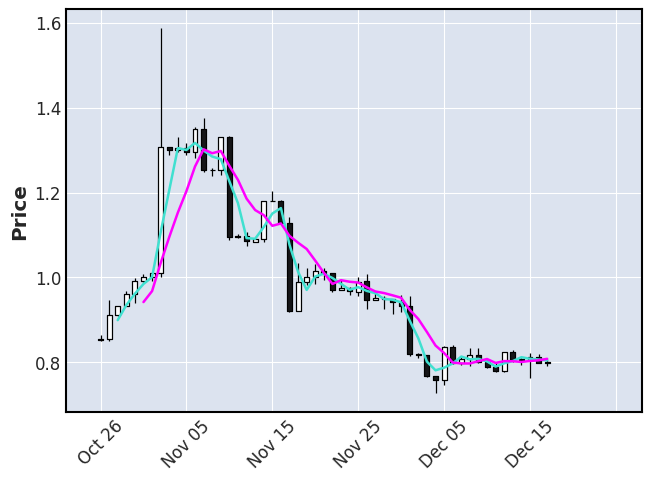

In [6]:
import mplfinance as mpf
mpf.plot(data1a[-60:], type='candle',mav=(3,6))

In [7]:
data2=data1[['date','Close']]
data2

,date,Close
0,2020-04-10,0.951054
1,2020-04-11,0.776819
2,2020-04-12,0.882507
3,2020-04-13,0.777832
4,2020-04-14,0.661925
...,...,...
619,2021-12-20,NaN
620,2021-12-21,NaN
621,2021-12-22,NaN
622,2021-12-23,NaN


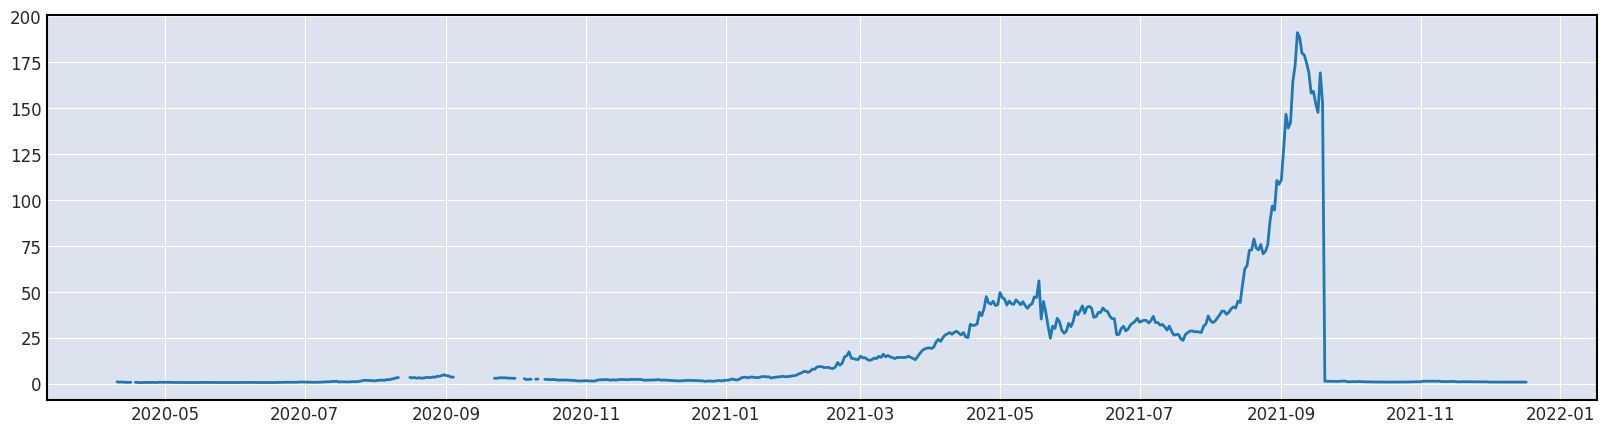

In [8]:
item1=data2

item1.columns = ['ds','y']
item1.y = item1.y.astype('float')
item1.ds = item1.ds.astype('datetime64')

rcParams['figure.figsize'] = 20,5
plt.plot(item1.ds, item1.y)

Initial log joint probability = -12.4784
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       856.979    0.00196332       131.576   1.293e-05       0.001      153  LS failed, Hessian reset 
      99       858.269    0.00189549       85.0124      0.7665      0.7665      162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       859.068     0.0031775       77.1429   4.216e-05       0.001      227  LS failed, Hessian reset 
     199        865.03   0.000141729       68.9477      0.2315       0.794      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     267       865.057   1.01651e-06        77.975   1.457e-08       0.001      467  LS failed, Hessian reset 
     277       865.057   5.43878e-08       66.0594      0.8213      0.8213      480   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

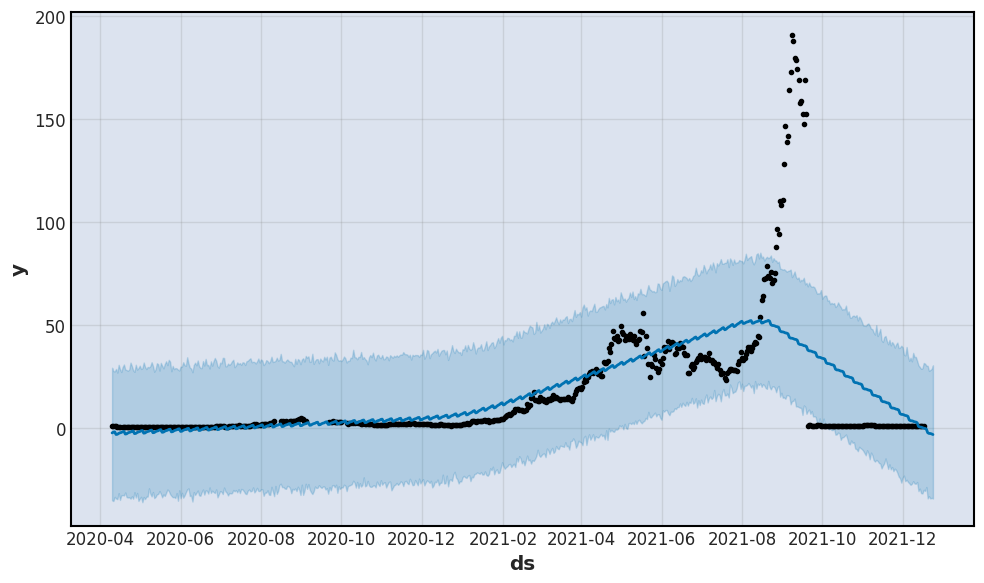

In [9]:
ph = Prophet()
ph.fit(item1)
forecast1=ph.predict(item1)
figure = ph.plot(forecast1)
figure.show()

In [10]:
from datetime import timedelta
start0 = dt.datetime.strptime('2021-01-01','%Y-%m-%d').date()
end0   = dt.datetime.strptime('2022-12-31','%Y-%m-%d').date()
print((end0-start0).days)

729


In [11]:
def daterange(start,end):
    for i in range((end-start).days):
        return start+timedelta(i)  
dates0=[]
for i in range((end0-start0).days):
    dates0+=[(start0+timedelta(i)).strftime('%Y-%m-%d') ]
    print(dates0[0:10])

['2021-01-01']
['2021-01-01', '2021-01-02']
['2021-01-01', '2021-01-02', '2021-01-03']
['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04']
['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05']
['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06']
['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07']
['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08']
['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09']
['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10']
['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10']
['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01

In [12]:
dates0_df=pd.DataFrame(dates0)
dates0_df.columns=['ds']
dates0_df

,ds
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04
4,2021-01-05
...,...
724,2022-12-26
725,2022-12-27
726,2022-12-28
727,2022-12-29


Initial log joint probability = -12.4784
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       856.979    0.00196332       131.576   1.293e-05       0.001      153  LS failed, Hessian reset 
      99       858.269    0.00189549       85.0124      0.7665      0.7665      162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       859.068     0.0031775       77.1429   4.216e-05       0.001      227  LS failed, Hessian reset 
     199        865.03   0.000141729       68.9477      0.2315       0.794      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     267       865.057   1.01651e-06        77.975   1.457e-08       0.001      467  LS failed, Hessian reset 
     277       865.057   5.43878e-08       66.0594      0.8213      0.8213      480   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

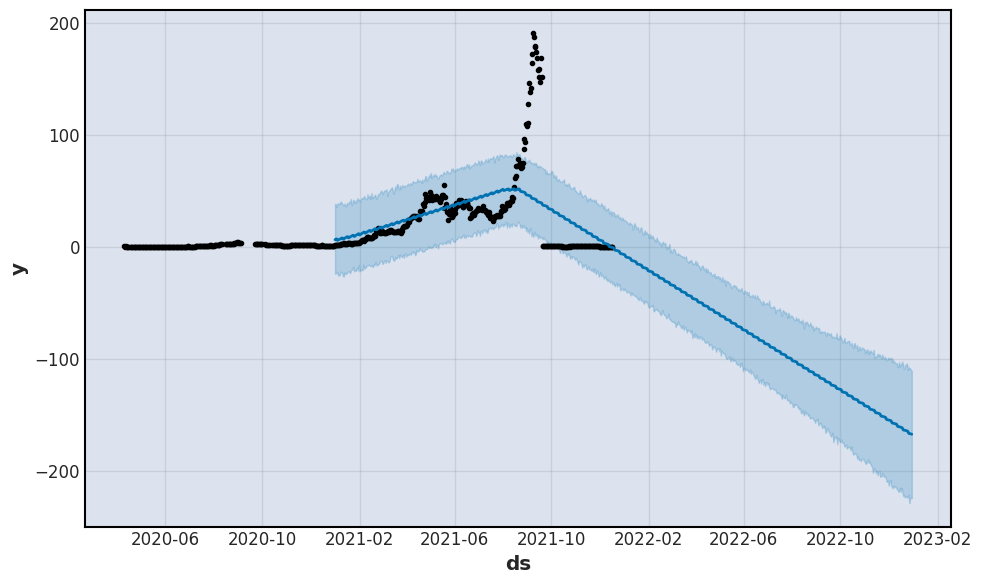

In [13]:
ph = Prophet()
ph.fit(item1)
forecast3=ph.predict(dates0_df)
figure = ph.plot(forecast3)
figure.show()

In [14]:
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
724,2022-12-26,-165.872781,-221.034466,-106.606751
725,2022-12-27,-166.236143,-228.278178,-108.364464
726,2022-12-28,-166.273419,-224.248042,-107.846777
727,2022-12-29,-166.474299,-223.475824,-109.711130
728,2022-12-30,-166.777322,-223.768986,-110.048035


In [15]:
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
724,2022-12-26,-165.872781,-221.034466,-106.606751
725,2022-12-27,-166.236143,-228.278178,-108.364464
726,2022-12-28,-166.273419,-224.248042,-107.846777
727,2022-12-29,-166.474299,-223.475824,-109.711130
728,2022-12-30,-166.777322,-223.768986,-110.048035
